In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import spacy
nlp = spacy.load("en_core_web_sm")

In [3]:
import pandas as pd
df_covid = pd.read_csv("../../data/processed/covid-2019-scientific-papers.csv")

In [4]:
text = "Compatibility of systems of linear constraints over the set of natural numbers. Criteria of compatibility of a system of linear Diophantine equations, strict inequations, and nonstrict inequations are considered. Upper bounds for components of a minimal set of solutions and algorithms of construction of minimal generating sets of solutions for all types of systems are given. These criteria and the corresponding algorithms for constructing a minimal supporting set of solutions can be used in solving all the considered types systems and systems of mixed types."

In [5]:
# text = df_covid["body_text"][1]
doc = nlp(text)

In [6]:
for sent in doc.sents:
    print(">", sent.start, sent.end)

> 0 13
> 13 33
> 33 61
> 61 91


In [7]:
for chunk in doc.noun_chunks:
    print(chunk.text)

Compatibility
systems
linear constraints
the set
natural numbers
Criteria
compatibility
a system
Diophantine equations
strict inequations
nonstrict inequations
Upper bounds
components
a minimal set
solutions
algorithms
construction
minimal generating sets
solutions
all types
systems
These criteria
the corresponding algorithms
a minimal supporting set
solutions
all the considered types systems
systems
mixed types


In [8]:
for ent in doc.ents:
    print(ent.text, ent.label_, ent.start, ent.end)

Diophantine PRODUCT 21 22


In [9]:
import networkx as nx

def increment_edge (graph, node0, node1):
    print("link {} {}".format(node0, node1))
    
    if graph.has_edge(node0, node1):
        graph[node0][node1]["weight"] += 1.0
    else:
        graph.add_edge(node0, node1, weight=1.0)

In [10]:
POS_KEPT = ["ADJ", "NOUN", "PROPN", "VERB"]

def link_sentence (doc, sent, lemma_graph, seen_lemma):
    visited_tokens = []
    visited_nodes = []

    for i in range(sent.start, sent.end):
        token = doc[i]

        if token.pos_ in POS_KEPT:
            key = (token.lemma_, token.pos_)

            if key not in seen_lemma:
                seen_lemma[key] = set([token.i])
            else:
                seen_lemma[key].add(token.i)

            node_id = list(seen_lemma.keys()).index(key)

            if not node_id in lemma_graph:
                lemma_graph.add_node(node_id)

            print("visit {} {}".format(visited_tokens, visited_nodes))
            print("range {}".format(list(range(len(visited_tokens) - 1, -1, -1))))
            
            for prev_token in range(len(visited_tokens) - 1, -1, -1):
                print("prev_tok {} {}".format(prev_token, (token.i - visited_tokens[prev_token])))
                
                if (token.i - visited_tokens[prev_token]) <= 3:
                    increment_edge(lemma_graph, node_id, visited_nodes[prev_token])
                else:
                    break

            print(" -- {} {} {} {} {} {}".format(token.i, token.text, token.lemma_, token.pos_, visited_tokens, visited_nodes))

            visited_tokens.append(token.i)
            visited_nodes.append(node_id)

In [11]:
lemma_graph = nx.Graph()
seen_lemma = {}

for sent in doc.sents:
    link_sentence(doc, sent, lemma_graph, seen_lemma)
    #break # only test one sentence

print(seen_lemma)

visit [] []
range []
 -- 0 Compatibility compatibility NOUN [] []
visit [0] [0]
range [0]
prev_tok 0 2
link 1 0
 -- 2 systems system NOUN [0] [0]
visit [0, 2] [0, 1]
range [1, 0]
prev_tok 1 2
link 2 1
prev_tok 0 4
 -- 4 linear linear ADJ [0, 2] [0, 1]
visit [0, 2, 4] [0, 1, 2]
range [2, 1, 0]
prev_tok 2 1
link 3 2
prev_tok 1 3
link 3 1
prev_tok 0 5
 -- 5 constraints constraint NOUN [0, 2, 4] [0, 1, 2]
visit [0, 2, 4, 5] [0, 1, 2, 3]
range [3, 2, 1, 0]
prev_tok 3 3
link 4 3
prev_tok 2 4
 -- 8 set set NOUN [0, 2, 4, 5] [0, 1, 2, 3]
visit [0, 2, 4, 5, 8] [0, 1, 2, 3, 4]
range [4, 3, 2, 1, 0]
prev_tok 4 2
link 5 4
prev_tok 3 5
 -- 10 natural natural ADJ [0, 2, 4, 5, 8] [0, 1, 2, 3, 4]
visit [0, 2, 4, 5, 8, 10] [0, 1, 2, 3, 4, 5]
range [5, 4, 3, 2, 1, 0]
prev_tok 5 1
link 6 5
prev_tok 4 3
link 6 4
prev_tok 3 6
 -- 11 numbers number NOUN [0, 2, 4, 5, 8, 10] [0, 1, 2, 3, 4, 5]
visit [] []
range []
 -- 13 Criteria criterion NOUN [] []
visit [13] [7]
range [0]
prev_tok 0 2
link 0 7
 -- 15 compa

In [12]:
labels = {}
keys = list(seen_lemma.keys())

for i in range(len(seen_lemma)):
    labels[i] = keys[i][0].lower()

labels

{0: 'compatibility',
 1: 'system',
 2: 'linear',
 3: 'constraint',
 4: 'set',
 5: 'natural',
 6: 'number',
 7: 'criterion',
 8: 'diophantine',
 9: 'equation',
 10: 'strict',
 11: 'inequation',
 12: 'nonstrict',
 13: 'consider',
 14: 'upper',
 15: 'bound',
 16: 'component',
 17: 'minimal',
 18: 'solution',
 19: 'algorithm',
 20: 'construction',
 21: 'generating',
 22: 'type',
 23: 'give',
 24: 'corresponding',
 25: 'construct',
 26: 'supporting',
 27: 'can',
 28: 'use',
 29: 'solve',
 30: 'mixed'}

{0: Text(-0.06455279025409133, 0.514703968940191, 'compatibility'),
 1: Text(-0.30570568680519056, 0.3476642889477077, 'system'),
 2: Text(-0.45563716788005315, 0.28716007315611414, 'linear'),
 3: Text(-0.12167577603419791, 0.0956831219721754, 'constraint'),
 4: Text(0.258734748945953, -0.2007736782258077, 'set'),
 5: Text(0.40907502326645784, -0.4555506350750074, 'natural'),
 6: Text(0.28507017930396406, -0.4897868597572926, 'number'),
 7: Text(0.27309497721091097, 0.5677565702024173, 'criterion'),
 8: Text(-0.632764236524979, 0.4018924226585412, 'diophantine'),
 9: Text(-0.7583945737833949, 0.33158075259438236, 'equation'),
 10: Text(-0.9038535202620118, 0.36989770718664317, 'strict'),
 11: Text(-0.8340458312000032, 0.1666423834655594, 'inequation'),
 12: Text(-0.8213746729424275, 0.025772411200172828, 'nonstrict'),
 13: Text(-0.5339604425726213, 0.10195294395447888, 'consider'),
 14: Text(0.659537943213316, -0.9761583534334, 'upper'),
 15: Text(0.5399410616460384, -1.0, 'bound'),
 1

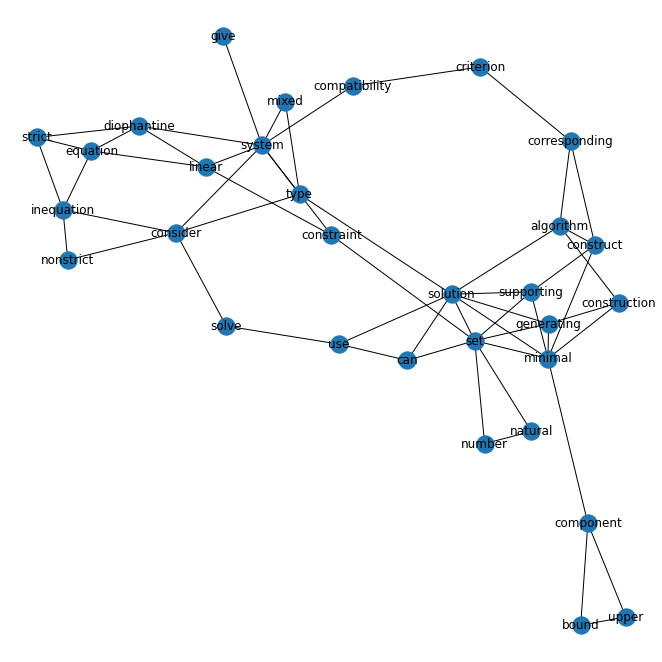

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(9, 9))
pos = nx.spring_layout(lemma_graph)

nx.draw(lemma_graph, pos=pos, with_labels=False, font_weight="bold")
nx.draw_networkx_labels(lemma_graph, pos, labels)


In [14]:
ranks = nx.pagerank(lemma_graph)
ranks

{0: 0.024271712355906368,
 1: 0.09333252040998133,
 2: 0.03523397804162026,
 3: 0.02206335459191633,
 4: 0.07861554068010741,
 5: 0.01809941577235555,
 6: 0.018099415772355555,
 7: 0.019060006636093224,
 8: 0.029808750669594285,
 9: 0.03048048654757325,
 10: 0.024130822879014753,
 11: 0.038123234125218,
 12: 0.0241093059622507,
 13: 0.03711169419801581,
 14: 0.023451020703587552,
 15: 0.023451020703587552,
 16: 0.03050388828323344,
 17: 0.06065433220816629,
 18: 0.06478113357971631,
 19: 0.03068873921565539,
 20: 0.02307689865072579,
 21: 0.028180619352715125,
 22: 0.04616659117609875,
 23: 0.010505124595345142,
 24: 0.025921063118458917,
 25: 0.030404750534637228,
 26: 0.02810309146111207,
 27: 0.022858064793249932,
 28: 0.024510385972397564,
 29: 0.018092057150289068,
 30: 0.01611097985902083}

In [15]:
for node_id, rank in sorted(ranks.items(), key=lambda x: x[1], reverse=True):
    print(node_id, rank, labels[node_id])

1 0.09333252040998133 system
4 0.07861554068010741 set
18 0.06478113357971631 solution
17 0.06065433220816629 minimal
22 0.04616659117609875 type
11 0.038123234125218 inequation
13 0.03711169419801581 consider
2 0.03523397804162026 linear
19 0.03068873921565539 algorithm
16 0.03050388828323344 component
9 0.03048048654757325 equation
25 0.030404750534637228 construct
8 0.029808750669594285 diophantine
21 0.028180619352715125 generating
26 0.02810309146111207 supporting
24 0.025921063118458917 corresponding
28 0.024510385972397564 use
0 0.024271712355906368 compatibility
10 0.024130822879014753 strict
12 0.0241093059622507 nonstrict
14 0.023451020703587552 upper
15 0.023451020703587552 bound
20 0.02307689865072579 construction
27 0.022858064793249932 can
3 0.02206335459191633 constraint
7 0.019060006636093224 criterion
6 0.018099415772355555 number
5 0.01809941577235555 natural
29 0.018092057150289068 solve
30 0.01611097985902083 mixed
23 0.010505124595345142 give


In [16]:
import math

def collect_phrases (chunk, phrases, counts):
    chunk_len = chunk.end - chunk.start + 1
    sq_sum_rank = 0.0
    non_lemma = 0
    compound_key = set([])

    for i in range(chunk.start, chunk.end):
        token = doc[i]
        key = (token.lemma_, token.pos_)
        
        if key in seen_lemma:
            node_id = list(seen_lemma.keys()).index(key)
            rank = ranks[node_id]
            sq_sum_rank += rank
            compound_key.add(key)
        
            print(" {} {} {} {}".format(token.lemma_, token.pos_, node_id, rank))
        else:
            non_lemma += 1
    
    # although the noun chunking is greedy, we discount the ranks using a
    # point estimate based on the number of non-lemma tokens within a phrase
    non_lemma_discount = chunk_len / (chunk_len + (2.0 * non_lemma) + 1.0)

    # use root mean square (RMS) to normalize the contributions of all the tokens
    phrase_rank = math.sqrt(sq_sum_rank / (chunk_len + non_lemma))
    phrase_rank *= non_lemma_discount

    # remove spurious punctuation
    phrase = chunk.text.lower().replace("'", "")

    # create a unique key for the the phrase based on its lemma components
    compound_key = tuple(sorted(list(compound_key)))
    
    if not compound_key in phrases:
        phrases[compound_key] = set([ (phrase, phrase_rank) ])
        counts[compound_key] = 1
    else:
        phrases[compound_key].add( (phrase, phrase_rank) )
        counts[compound_key] += 1

    print("{} {} {} {} {} {}".format(phrase_rank, chunk.text, chunk.start, chunk.end, chunk_len, counts[compound_key]))

In [17]:
phrases = {}
counts = {}

for chunk in doc.noun_chunks:
    collect_phrases(chunk, phrases, counts)

for ent in doc.ents:
    collect_phrases(ent, phrases, counts)

 compatibility NOUN 0 0.024271712355906368
0.07344190804212593 Compatibility 0 1 2 1
 system NOUN 1 0.09333252040998133
0.14401583277927105 systems 2 3 2 1
 linear ADJ 2 0.03523397804162026
 constraint NOUN 3 0.02206335459191633
0.10364964963176726 linear constraints 4 6 3 1
 set NOUN 4 0.07861554068010741
0.0700961574731933 the set 7 9 3 1
 natural ADJ 5 0.01809941577235555
 number NOUN 6 0.018099415772355555
0.08238495563289047 natural numbers 10 12 3 1
 criterion NOUN 7 0.019060006636093224
0.06508115725955507 Criteria 13 14 2 1
 compatibility NOUN 0 0.024271712355906368
0.07344190804212593 compatibility 15 16 2 2
 system NOUN 1 0.09333252040998133
0.07637592896733783 a system 17 19 3 2
 Diophantine PROPN 8 0.029808750669594285
 equation NOUN 9 0.03048048654757325
0.1063213618151071 Diophantine equations 21 23 3 1
 strict ADJ 10 0.024130822879014753
 inequation NOUN 11 0.038123234125218
0.10803997264111853 strict inequations 24 26 3 1
 nonstrict ADJ 12 0.0241093059622507
 inequation

In [18]:
import operator

min_phrases = {}

for compound_key, rank_tuples in phrases.items():
    l = list(rank_tuples)
    l.sort(key=operator.itemgetter(1), reverse=True)
    
    phrase, rank = l[0]
    count = counts[compound_key]
    
    min_phrases[phrase] = (rank, count)

In [19]:
for phrase, (rank, count) in sorted(min_phrases.items(), key=lambda x: x[1][0], reverse=True):
    print(phrase, count, rank)

minimal generating sets 1 0.16368286030784718
systems 4 0.14401583277927105
solutions 3 0.11998252982063337
mixed types 1 0.10806037464808699
strict inequations 1 0.10803997264111853
nonstrict inequations 1 0.10802130005883276
diophantine equations 1 0.1063213618151071
a minimal supporting set 1 0.10438715134774235
linear constraints 1 0.10364964963176726
a minimal set 1 0.09536862886869783
upper bounds 1 0.09377703750836519
algorithms 1 0.08258159495735837
natural numbers 1 0.08238495563289047
components 1 0.08233250780049482
diophantine 1 0.0813889846076568
all the considered types systems 1 0.08104425003073869
compatibility 2 0.07344190804212593
construction 1 0.07161144950467967
the set 1 0.0700961574731933
criteria 2 0.06508115725955507
the corresponding algorithms 1 0.06080268647884071
all types 1 0.05371603064734187


In [20]:
for node_id, rank in sorted(ranks.items(), key=lambda x: x[1], reverse=True):
    print(labels[node_id], rank)

system 0.09333252040998133
set 0.07861554068010741
solution 0.06478113357971631
minimal 0.06065433220816629
type 0.04616659117609875
inequation 0.038123234125218
consider 0.03711169419801581
linear 0.03523397804162026
algorithm 0.03068873921565539
component 0.03050388828323344
equation 0.03048048654757325
construct 0.030404750534637228
diophantine 0.029808750669594285
generating 0.028180619352715125
supporting 0.02810309146111207
corresponding 0.025921063118458917
use 0.024510385972397564
compatibility 0.024271712355906368
strict 0.024130822879014753
nonstrict 0.0241093059622507
upper 0.023451020703587552
bound 0.023451020703587552
construction 0.02307689865072579
can 0.022858064793249932
constraint 0.02206335459191633
criterion 0.019060006636093224
number 0.018099415772355555
natural 0.01809941577235555
solve 0.018092057150289068
mixed 0.01611097985902083
give 0.010505124595345142


In [ ]:
text = "Compatibility of systems of linear constraints over the set of natural numbers. Criteria of compatibility of a system of linear Diophantine equations, strict inequations, and nonstrict inequations are considered. Upper bounds for components of a minimal set of solutions and algorithms of construction of minimal generating sets of solutions for all types of systems are given. These criteria and the corresponding algorithms for constructing a minimal supporting set of solutions can be used in solving all the considered types systems and systems of mixed types."

In [4]:
text = df_covid["body_text"][1]

In [5]:
import pytextrank

tr = pytextrank.TextRank()
nlp.add_pipe(tr.PipelineComponent, name="textrank", last=True)

doc = nlp(text)

In [6]:
for p in doc._.phrases:
    print("{:.4f} {:5d}  {}".format(p.rank, p.count, p.text))
    print(p.chunks)

0.0788    23  hygiene behaviour
[hygiene behaviour, hygiene behaviour, hygiene behaviour, hygiene behaviour, hygiene behaviour, hygiene behaviour, hygiene behaviour, hygiene behaviour, hygiene behaviour, hygiene behaviour, hygiene behaviours, hygiene behaviour, hygiene behaviour, hygiene behaviour, hygiene behaviours, hygiene behaviours, hygiene behaviour, hygiene behaviour, hygiene behaviour, hygiene behaviour, hygiene behaviour, hygiene behaviour, hygiene behaviour]
0.0778     1  hygiene promotion programmes
[hygiene promotion programmes]
0.0761     8  hygiene practices
[hygiene practices, hygiene practice, hygiene practices, hygiene practices, hygiene practice, hygiene practices, hygiene practices, hygiene practices]
0.0755     1  hygiene behaviour change
[hygiene behaviour change]
0.0744     5  food hygiene
[food hygiene, food hygiene, food hygiene, food hygiene, Food hygiene]
0.0732     1  hygiene trials
[hygiene Trials]
0.0724     1  school hygiene
[school hygiene]
0.0723     1  

In [7]:
sent_bounds = [ [s.start, s.end, set([])] for s in doc.sents ]
sent_bounds

[[0, 20, set()],
 [20, 45, set()],
 [45, 94, set()],
 [94, 105, set()],
 [105, 116, set()],
 [116, 145, set()],
 [145, 174, set()],
 [174, 194, set()],
 [194, 215, set()],
 [215, 233, set()],
 [233, 263, set()],
 [263, 285, set()],
 [285, 308, set()],
 [308, 334, set()],
 [334, 353, set()],
 [353, 381, set()],
 [381, 403, set()],
 [403, 425, set()],
 [425, 437, set()],
 [437, 465, set()],
 [465, 499, set()],
 [499, 529, set()],
 [529, 558, set()],
 [558, 578, set()],
 [578, 600, set()],
 [600, 618, set()],
 [618, 638, set()],
 [638, 681, set()],
 [681, 682, set()],
 [682, 704, set()],
 [704, 721, set()],
 [721, 733, set()],
 [733, 771, set()],
 [771, 787, set()],
 [787, 788, set()],
 [788, 811, set()],
 [811, 839, set()],
 [839, 884, set()],
 [884, 897, set()],
 [897, 898, set()],
 [898, 915, set()],
 [915, 953, set()],
 [953, 966, set()],
 [966, 1001, set()],
 [1001, 1047, set()],
 [1047, 1063, set()],
 [1063, 1084, set()],
 [1084, 1085, set()],
 [1085, 1116, set()],
 [1116, 1143, set

In [8]:
limit_phrases = 4

phrase_id = 0
unit_vector = []

for p in doc._.phrases:
    print(phrase_id, p.text, p.rank)
    
    unit_vector.append(p.rank)
    
    for chunk in p.chunks:
        print(" ", chunk.start, chunk.end)
        
        for sent_start, sent_end, sent_vector in sent_bounds:
            if chunk.start >= sent_start and chunk.start <= sent_end:
                print(" ", sent_start, chunk.start, chunk.end, sent_end)
                sent_vector.add(phrase_id)
                break

    phrase_id += 1

    if phrase_id == limit_phrases:
        break

0 hygiene behaviour 0.07875221169520424
  339 341
  334 339 341 353
  2595 2597
  2582 2595 2597 2617
  2816 2818
  2813 2816 2818 2829
  3241 3243
  3227 3241 3243 3244
  3727 3729
  3696 3727 3729 3730
  3857 3859
  3847 3857 3859 3892
  4054 4056
  4028 4054 4056 4068
  4312 4314
  4299 4312 4314 4321
  4573 4575
  4555 4573 4575 4596
  5991 5993
  5961 5991 5993 6009
  6329 6331
  6322 6329 6331 6362
  6412 6414
  6404 6412 6414 6435
  6436 6438
  6435 6436 6438 6483
  339 341
  334 339 341 353
  450 452
  437 450 452 465
  1845 1847
  1821 1845 1847 1870
  3241 3243
  3227 3241 3243 3244
  3857 3859
  3847 3857 3859 3892
  4312 4314
  4299 4312 4314 4321
  4459 4461
  4434 4459 4461 4466
  4573 4575
  4555 4573 4575 4596
  5991 5993
  5961 5991 5993 6009
  6436 6438
  6435 6436 6438 6483
1 hygiene promotion programmes 0.07784004995234366
  4753 4756
  4748 4753 4756 4783
2 hygiene practices 0.07613798745022668
  2246 2248
  2216 2246 2248 2249
  2301 2303
  2292 2301 2303 2312
  2

In [9]:
sent_bounds

[[0, 20, set()],
 [20, 45, set()],
 [45, 94, set()],
 [94, 105, set()],
 [105, 116, set()],
 [116, 145, set()],
 [145, 174, set()],
 [174, 194, set()],
 [194, 215, set()],
 [215, 233, set()],
 [233, 263, set()],
 [263, 285, set()],
 [285, 308, set()],
 [308, 334, set()],
 [334, 353, {0}],
 [353, 381, set()],
 [381, 403, set()],
 [403, 425, set()],
 [425, 437, set()],
 [437, 465, {0}],
 [465, 499, set()],
 [499, 529, set()],
 [529, 558, set()],
 [558, 578, set()],
 [578, 600, set()],
 [600, 618, set()],
 [618, 638, set()],
 [638, 681, set()],
 [681, 682, set()],
 [682, 704, set()],
 [704, 721, set()],
 [721, 733, set()],
 [733, 771, set()],
 [771, 787, set()],
 [787, 788, set()],
 [788, 811, set()],
 [811, 839, set()],
 [839, 884, set()],
 [884, 897, set()],
 [897, 898, set()],
 [898, 915, set()],
 [915, 953, set()],
 [953, 966, {2}],
 [966, 1001, set()],
 [1001, 1047, set()],
 [1047, 1063, set()],
 [1063, 1084, set()],
 [1084, 1085, set()],
 [1085, 1116, set()],
 [1116, 1143, set()],
 

In [10]:
for sent in doc.sents:
    print(sent)

Promotion of hygiene might be the single most costeff ective way of reducing the global burden of infectious disease.
1 One might therefore expect hygiene to be the subject of multimillion dollar international initiatives like those for malaria or HIV/AIDS prevention.
Perhaps because hygiene does not require clever new technologies or products, or perhaps because it is a domestic and personal issue largely aff ecting women and children, and perhaps because it concerns the neglected diarrhoeal and respiratory diseases (still the two biggest killers of children)
, hygiene is still very much overlooked in public health.
There are signs that the situation is beginning to improve.
Governments and funding agencies increasingly accept that hygiene promotion should play a part in health investments across the wider community, not just in health-care settings.
Policy makers are also realising that the health benefi ts of increased investment in water and sanitation infrastructure are largely de

In [11]:
unit_vector

[0.07875221169520424,
 0.07784004995234366,
 0.07613798745022668,
 0.07547862859488833]

In [12]:
sum_ranks = sum(unit_vector)
unit_vector = [ rank/sum_ranks for rank in unit_vector ]

unit_vector

[0.2555157148125165,
 0.25255615780789914,
 0.24703372602443108,
 0.24489440135515322]

In [13]:
from math import sqrt

sent_rank = {}
sent_id = 0

for sent_start, sent_end, sent_vector in sent_bounds:
    print(sent_vector)
    sum_sq = 0.0
    
    for phrase_id in range(len(unit_vector)):
        print(phrase_id, unit_vector[phrase_id])
        
        if phrase_id not in sent_vector:
            sum_sq += unit_vector[phrase_id]**2.0

    sent_rank[sent_id] = sqrt(sum_sq)
    sent_id += 1

print(sent_rank)

set()
0 0.2555157148125165
1 0.25255615780789914
2 0.24703372602443108
3 0.24489440135515322
set()
0 0.2555157148125165
1 0.25255615780789914
2 0.24703372602443108
3 0.24489440135515322
set()
0 0.2555157148125165
1 0.25255615780789914
2 0.24703372602443108
3 0.24489440135515322
set()
0 0.2555157148125165
1 0.25255615780789914
2 0.24703372602443108
3 0.24489440135515322
set()
0 0.2555157148125165
1 0.25255615780789914
2 0.24703372602443108
3 0.24489440135515322
set()
0 0.2555157148125165
1 0.25255615780789914
2 0.24703372602443108
3 0.24489440135515322
set()
0 0.2555157148125165
1 0.25255615780789914
2 0.24703372602443108
3 0.24489440135515322
set()
0 0.2555157148125165
1 0.25255615780789914
2 0.24703372602443108
3 0.24489440135515322
set()
0 0.2555157148125165
1 0.25255615780789914
2 0.24703372602443108
3 0.24489440135515322
set()
0 0.2555157148125165
1 0.25255615780789914
2 0.24703372602443108
3 0.24489440135515322
set()
0 0.2555157148125165
1 0.25255615780789914
2 0.24703372602443108

In [14]:
from operator import itemgetter

sorted(sent_rank.items(), key=itemgetter(1))

[(14, 0.42986456292104497),
 (19, 0.42986456292104497),
 (84, 0.42986456292104497),
 (113, 0.42986456292104497),
 (123, 0.42986456292104497),
 (143, 0.42986456292104497),
 (163, 0.42986456292104497),
 (169, 0.42986456292104497),
 (176, 0.42986456292104497),
 (187, 0.42986456292104497),
 (193, 0.42986456292104497),
 (199, 0.42986456292104497),
 (253, 0.42986456292104497),
 (266, 0.42986456292104497),
 (269, 0.42986456292104497),
 (270, 0.42986456292104497),
 (207, 0.43161002088084544),
 (42, 0.4347943895428489),
 (97, 0.4347943895428489),
 (99, 0.4347943895428489),
 (112, 0.4347943895428489),
 (251, 0.4347943895428489),
 (271, 0.43600293021532943),
 (0, 0.5000718178136538),
 (1, 0.5000718178136538),
 (2, 0.5000718178136538),
 (3, 0.5000718178136538),
 (4, 0.5000718178136538),
 (5, 0.5000718178136538),
 (6, 0.5000718178136538),
 (7, 0.5000718178136538),
 (8, 0.5000718178136538),
 (9, 0.5000718178136538),
 (10, 0.5000718178136538),
 (11, 0.5000718178136538),
 (12, 0.5000718178136538),
 (1

In [16]:
limit_sentences = 5

sent_text = {}
sent_id = 0

for sent in doc.sents:
    sent_text[sent_id] = sent.text
    sent_id += 1

num_sent = 0

for sent_id, rank in sorted(sent_rank.items(), key=itemgetter(1)):
    print(sent_id, sent_text[sent_id])
    num_sent += 1
    
    if num_sent == limit_sentences:
        break

14 Growing understanding of what shapes hygiene behaviour and creative partnerships are changing the way improvement is being approached.
19 Because the source of infections is human faecal material, the most important hygiene behaviours are clearly those that keep faecal matter out of the domestic environment.
84 For example, Haggerty and co-workers 49 did a large clusterrandomised trial to test the eff ect of promoting four diff erent hygiene behaviours (handwashing after faecal contact, handwashing before food contact, disposal of animal faeces, and disposal of child faeces).
113 Though changing behaviour is diffi cult, we know a lot more about hygiene behaviour than we did 10 years ago and promising approaches to changing hygiene on a large scale are emerging.

123 Three kinds of hygiene behaviour were identifi ed: habitual, motivated, and planned.
